<a href="https://colab.research.google.com/github/nafamubarokhusni/MALT1-Classification-Tugas-Besar-Bioinformatika/blob/main/CDD_ML_Part_5_MALT1_Compare_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of MALT1 inhibitors.



## **1. Import libraries**

In [2]:
! pip install lazypredict

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## **2. Load the data set**


In [4]:
! wget https://raw.githubusercontent.com/nafamubarokhusni/MALT1-Classification-Tugas-Besar-Bioinformatika/main/3.%20PaDEL%20descriptor%20Dataset/MALT1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2024-12-12 03:29:19--  https://raw.githubusercontent.com/nafamubarokhusni/MALT1-Classification-Tugas-Besar-Bioinformatika/main/3.%20PaDEL%20descriptor%20Dataset/MALT1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 676791 (661K) [text/plain]
Saving to: ‘MALT1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

MALT1_06_bioactivit 100%[===================>] 660.93K  --.-KB/s    in 0.04s   

2024-12-12 03:29:19 (15.6 MB/s) - ‘MALT1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’ saved [676791/676791]



In [5]:
df = pd.read_csv('MALT1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [6]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [7]:
# Examine X dimension
X.shape

(374, 881)

In [8]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(374, 154)

In [9]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [10]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:17<00:00,  2.35it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 299, number of used features: 154
[LightGBM] [Info] Start training from score 5.838831
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

100%|██████████| 42/42 [00:17<00:00,  2.41it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 299, number of used features: 154
[LightGBM] [Info] Start training from score 5.838831
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [11]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.87,0.94,0.32,0.07
ExtraTreeRegressor,0.87,0.94,0.32,0.18
ExtraTreesRegressor,0.87,0.94,0.32,0.93
GaussianProcessRegressor,0.87,0.94,0.32,0.16
XGBRegressor,0.87,0.94,0.32,0.21
RandomForestRegressor,0.73,0.87,0.45,0.64
MLPRegressor,0.69,0.85,0.49,0.64
BaggingRegressor,0.68,0.85,0.50,0.09
GradientBoostingRegressor,0.59,0.80,0.56,0.30


In [12]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,13448858008184667384023959047292948864211195055...,-1453930595479423370747144634293290707582275316...,43560486846743581902766080.00,0.15
RANSACRegressor,3126227248896076681314304.00,-3379705133941704070529024.00,2100198252756.37,1.39
TransformedTargetRegressor,48830519367639282745344.00,-52789750667718143508480.00,262479682778.55,0.06
LinearRegression,48830519367639282745344.00,-52789750667718143508480.00,262479682778.55,0.04
KernelRidge,25.58,-25.57,5.89,0.15
GaussianProcessRegressor,17.81,-17.17,4.87,0.06
QuantileRegressor,2.01,-0.10,1.20,0.10
DummyRegressor,1.93,-0.00,1.14,0.02
Lasso,1.93,-0.00,1.14,0.08


## **5. Data visualization of model performance**

[(0.0, 1.0)]

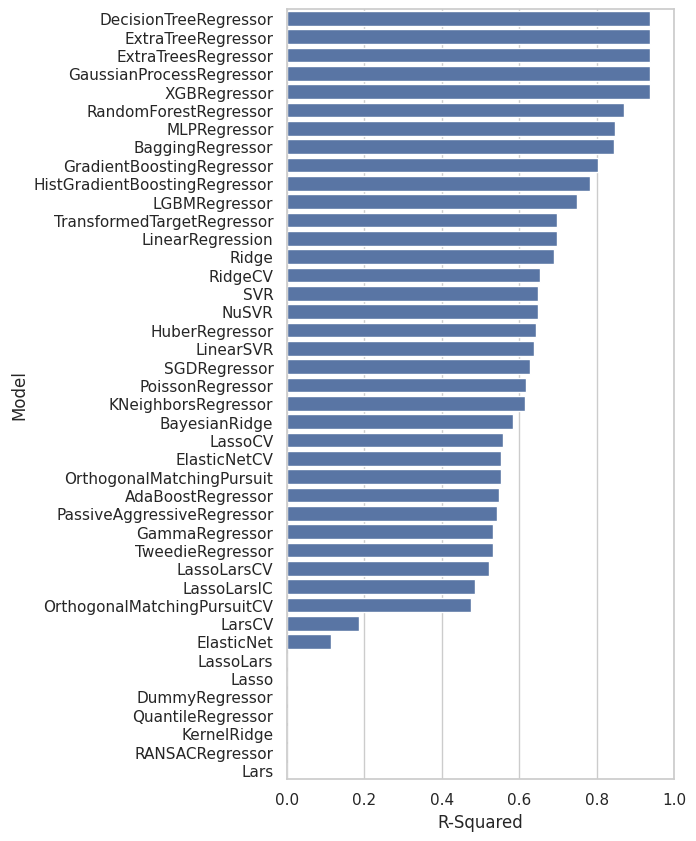

In [13]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

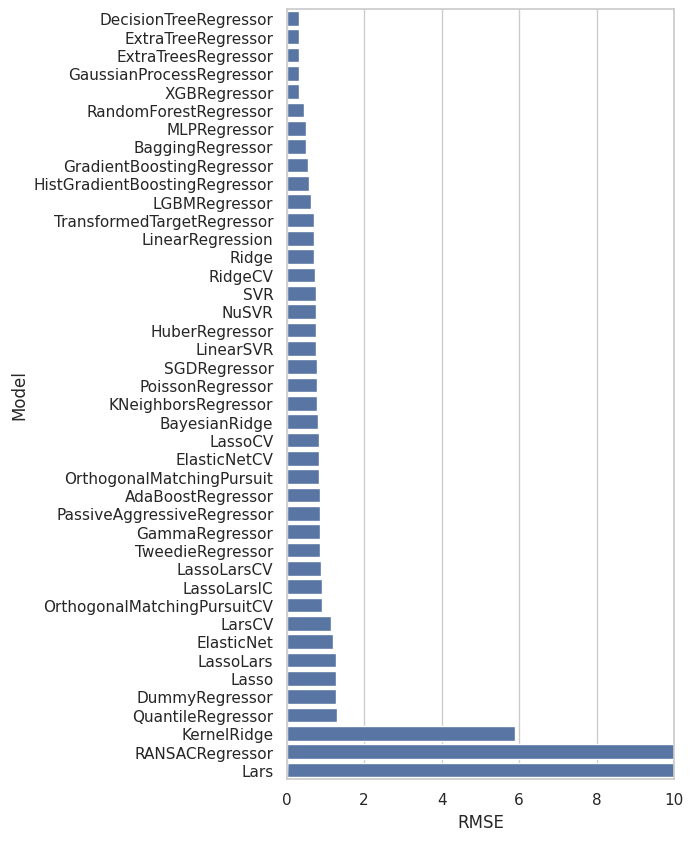

In [14]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

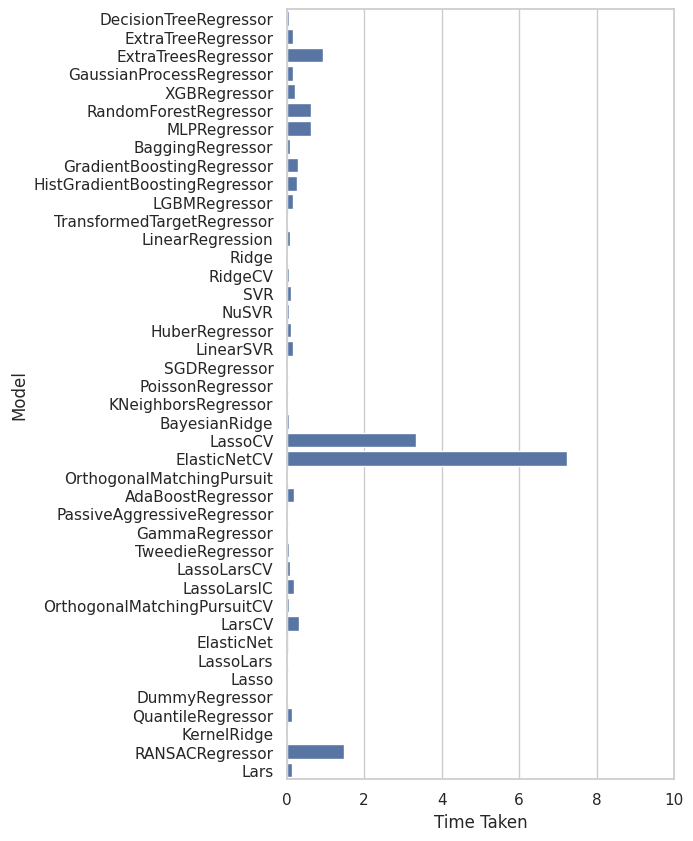

In [15]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))